# 自然言語処理 for Begginers

1,テキストを数値データとして表現する

2,テキストベースのデータセットをpandasで読み込む

3,データセットをベクトル化する

4,モデルの構築と評価

5,モデルを比較する

6,モデルを検証し、更なる洞察を得る

7,別のデータセットでこのワークフローを実践する

8,ベクタライザのチューニング

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

## 1, テキストを数値データとして表現する

In [2]:
simple_train = ['call you tonight', 'Call me a cab', 'Please call me...PLEASE!']

CountVectorizerを使用して、トークンの行列に変換する。

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [4]:
# simple_trainのデータを学習させる。
vect.fit(simple_train)

CountVectorizer()

In [5]:
# 抽出した単語の確認。
vect.get_feature_names()

/Users/yamaguchiayumiyume/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['cab', 'call', 'me', 'please', 'tonight', 'you']

In [6]:
# ベクトル化する。
simple_train_dtm = vect.transform(simple_train)
simple_train_dtm

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [7]:
simple_train_dtm.toarray()

array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]])

In [8]:
# 語彙と文書用語マトリックスを一緒に調べる
pd.DataFrame(simple_train_dtm.toarray(), columns=vect.get_feature_names())

cab  call  me  please  tonight  you
0    0     1   0       0        1    1
1    1     1   1       0        0    0
2    0     1   1       2        0    0

トークン出現頻度は特徴量として扱われる。
与えられた文書に対するすべてのトークン頻度のベクトルは、多変量サンプルとみなされる。（文書のコーパスは、文書毎に1行、コーパスに出現するトークン毎に１列の行列で表現することができる。
※コーパス・・・テキストや発話を大規模に集めてデータベース化した言語資料。

In [9]:
# 文書用語マトリックスの型をチェックする
type(simple_train_dtm)
# type・・・引数に渡したオブジェクトの型を返す関数。

# 疎行列・・・成分のほとんどが0である行列を疎行列（sparse行列)
# 密行列・・・疎行列ではない行列（成分のほとんどが０ではない。）
# 成分のほとんどが0である疎行列じはnumpy.ndarrayで表すよりも、scipy.sparseのクラスで表した方がメモリ使用量が少なく処理速度も高速になる。

# CSR形式(Compressed Sparse Row)・・・圧縮行格納形式。行方向に探索し、非ゼロの行列の要素を格納していく。利点は、行のスライスなど行毎に行われる処理が得意なこと。

scipy.sparse._csr.csr_matrix

In [10]:
print(simple_train_dtm)

  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	2


In [11]:
simple_test = ["please don't call me"]

In [12]:
simple_test_dtm = vect.transform(simple_test)
simple_test_dtm.toarray()

array([[0, 1, 1, 1, 0, 0]])

In [13]:
pd.DataFrame(simple_test_dtm.toarray(), columns=vect.get_feature_names())

/Users/yamaguchiayumiyume/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


cab  call  me  please  tonight  you
0    0     1   1       1        0    0

### 要約
・vect.fit(train)学習データのボキャブラリーを学習する。 <br>
・vect.transform(train)は、学習データから文書用語列を作成するために、適合したボキャブラリーを使用する。<br>
・vect.transform(test)は、適合したボキャブラリーを用いて、テストデータから文書用語行列を作成する。（見たことのないトークンは無視する。）

#### 補足
文書用語マトリックス・・・文書の集合に出現する用語の頻度を表す数学的行列。行はコレクション内のドキュメントに対応し、列は用語に対応する。

## 2,テキストベースのデータセットをpandasで読み込む

In [15]:
# https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset ⇦このデータセットを使用する。
sms = pd.read_csv("tweet-sentiment-extraction (1)/spam.csv", encoding='latin-1')
sms.dropna(how="any", inplace=True, axis=1)
sms.columns = ['label', 'message']
sms.head()

# dropnaのhow="any"(デフォルト)・・・欠損値が1つでも含まれる行・列を削除。inplace・・・元のオブジェクトを変更。

label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

### 探索的データ分析

In [16]:
sms.describe()

label                 message
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30

In [17]:
sms.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [18]:
# ラベルを数値変数に変換して、新しいカラムに入れておく。
sms['label_num'] = sms.label.map({'ham':0, 'spam':1})
sms.head()

label                                            message  label_num
0   ham  Go until jurong point, crazy.. Available only ...          0
1   ham                      Ok lar... Joking wif u oni...          0
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...          1
3   ham  U dun say so early hor... U c already then say...          0
4   ham  Nah I don't think he goes to usf, he lives aro...          0

In [21]:
sms['message_len'] = sms.message.apply(len)
sms.head()
# apply・・・pandasで要素、行、列に関数を適用する。

label                                            message  label_num  \
0   ham  Go until jurong point, crazy.. Available only ...          0   
1   ham                      Ok lar... Joking wif u oni...          0   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...          1   
3   ham  U dun say so early hor... U c already then say...          0   
4   ham  Nah I don't think he goes to usf, he lives aro...          0   

   message_len  
0          111  
1           29  
2          155  
3           49  
4           61

Text(0.5, 0, 'Message Length')

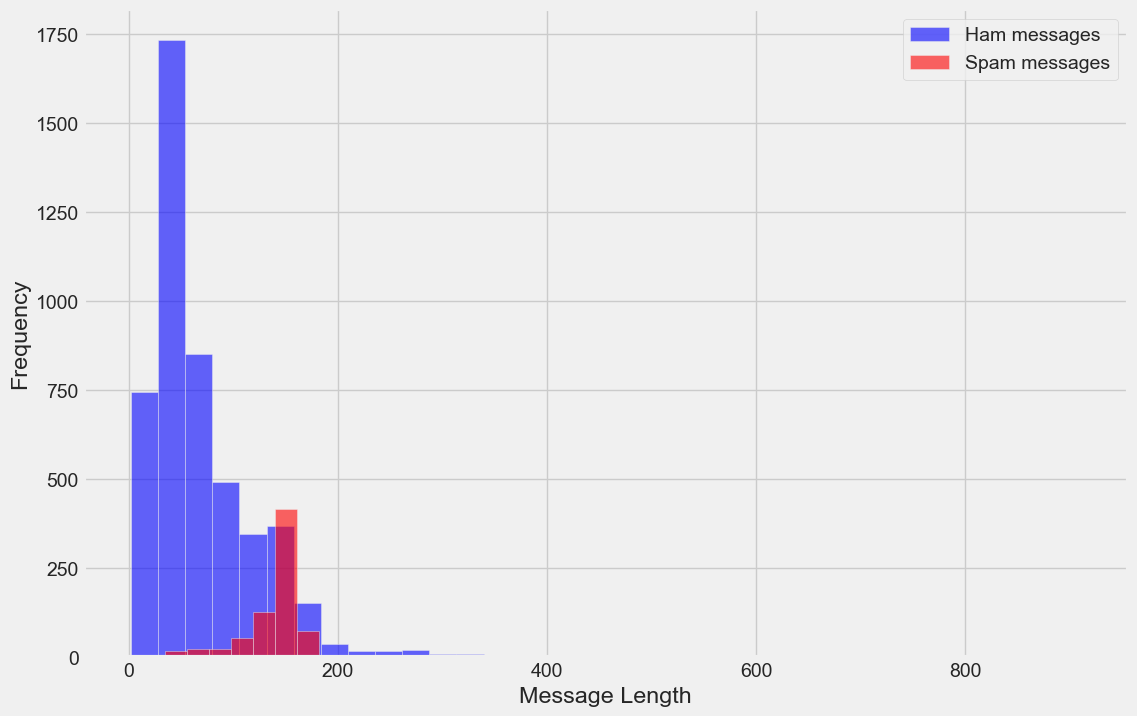

In [23]:
plt.figure(figsize=(12, 8))

sms[sms.label=='ham'].message_len.plot(bins=35, kind='hist', color='blue', label='Ham messages', alpha=0.6)
sms[sms.label=='spam'].message_len.plot(kind='hist', color='red', label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

スパムメールの文字数が多くなる傾向があることを発見することができた。

In [25]:
sms[sms.label=='ham'].describe()

label_num  message_len
count     4825.0  4825.000000
mean         0.0    71.023627
std          0.0    58.016023
min          0.0     2.000000
25%          0.0    33.000000
50%          0.0    52.000000
75%          0.0    92.000000
max          0.0   910.000000

In [26]:
sms[sms.label=='spam'].describe()

label_num  message_len
count      747.0   747.000000
mean         1.0   138.866131
std          0.0    29.183082
min          1.0    13.000000
25%          1.0   132.500000
50%          1.0   149.000000
75%          1.0   157.000000
max          1.0   224.000000

910のメッセージがあるので、マスキングを使用して、探してみる。

In [27]:
sms[sms.message_len == 910].message.iloc[0]

# loc・・・行名、列名を指定することで特定の列を抽出することができる。
# iloc・・・indexを指定することで特定の列を抽出することができる。

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

## テキストの前処理

bag of words方式などで、テキスト中の各単語を1つの数値で表現する。（テキストを文字列　にする前処理を行う。)<br>
ここから、生のメッセージデータをベクトルに変換していく。<br>
まずは、形態素解析をしてstopwordsを削除する。

In [31]:
import string
from nltk.corpus import stopwords

def text_process(mess):
    # 句読点を除去
    # ストップワードを除去
    # 削除されたテキストのリストを返す。
    
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    
    # 文字が句読点の中にあるかどうかをチェックする。
    nopunc = [char for char in mess if char not in string.punctuation]

    # 再び文字を結合して、文字列を形成する。
    nopunc = ''.join(nopunc)
    
    # ストップワードを削除する。
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In [32]:
sms.head()

label                                            message  label_num  \
0   ham  Go until jurong point, crazy.. Available only ...          0   
1   ham                      Ok lar... Joking wif u oni...          0   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...          1   
3   ham  U dun say so early hor... U c already then say...          0   
4   ham  Nah I don't think he goes to usf, he lives aro...          0   

   message_len  
0          111  
1           29  
2          155  
3           49  
4           61

In [33]:
sms['clean_msg'] = sms.message.apply(text_process)

In [35]:
sms.head()

label                                            message  label_num  \
0   ham  Go until jurong point, crazy.. Available only ...          0   
1   ham                      Ok lar... Joking wif u oni...          0   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...          1   
3   ham  U dun say so early hor... U c already then say...          0   
4   ham  Nah I don't think he goes to usf, he lives aro...          0   

   message_len                                          clean_msg  
0          111  Go jurong point crazy Available bugis n great ...  
1           29                              Ok lar Joking wif oni  
2          155  Free entry wkly comp win FA Cup final tkts 21s...  
3           49                    dun say early hor c already say  
4           61             Nah think goes usf lives around though

In [36]:
type(stopwords.words('english'))

list

In [37]:
from collections import Counter
# collections.Counter()にリストやタプルを渡すと、Counterオブジェクトが生成される。Counterは辞書型dictのサブクラスで、キーに要素、値に出現回数という形のデータをもつ。

words = sms[sms.label=='ham'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

for msg in words:
    ham_words.update(msg)
    
print(ham_words.most_common(50))

# most_common()・・・(要素, 出現回数)という形のタプルを出現回数

[('get', 303), ('ltgt', 276), ('ok', 272), ('go', 247), ('ill', 236), ('know', 232), ('got', 231), ('like', 229), ('call', 229), ('come', 224), ('good', 222), ('time', 189), ('day', 187), ('love', 185), ('going', 167), ('want', 163), ('one', 162), ('home', 160), ('lor', 160), ('need', 156), ('sorry', 153), ('still', 146), ('see', 137), ('n', 134), ('later', 134), ('da', 131), ('r', 131), ('back', 129), ('think', 128), ('well', 126), ('today', 125), ('send', 123), ('tell', 121), ('cant', 118), ('ì', 117), ('hi', 117), ('take', 112), ('much', 112), ('oh', 111), ('night', 107), ('hey', 106), ('happy', 105), ('great', 100), ('way', 100), ('hope', 99), ('pls', 98), ('work', 96), ('wat', 95), ('thats', 94), ('dear', 94)]


In [39]:
words = sms[sms.label=='spam'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
spam_words = Counter()

for msg in words:
    spam_words.update(msg)
    
print(spam_words.most_common(50))

[('call', 347), ('free', 216), ('txt', 150), ('mobile', 123), ('text', 120), ('claim', 113), ('stop', 113), ('reply', 101), ('prize', 92), ('get', 83), ('new', 69), ('send', 67), ('nokia', 65), ('urgent', 63), ('cash', 62), ('win', 60), ('contact', 56), ('service', 55), ('please', 52), ('guaranteed', 50), ('customer', 49), ('16', 49), ('week', 49), ('tone', 48), ('per', 46), ('phone', 45), ('18', 43), ('chat', 42), ('awarded', 38), ('draw', 38), ('latest', 36), ('å£1000', 35), ('line', 35), ('150ppm', 34), ('mins', 34), ('receive', 33), ('camera', 33), ('1', 33), ('every', 33), ('message', 32), ('holiday', 32), ('landline', 32), ('shows', 31), ('å£2000', 31), ('go', 31), ('box', 30), ('number', 30), ('apply', 29), ('code', 29), ('live', 29)]
